In [1]:
from ROOT import TEfficiency, TFile, TDirectory, TCanvas, gStyle, TGraphAsymmErrors, TLegend

Welcome to JupyROOT 6.26/00


In [2]:
x =  ( 0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4., 4.5, 5., 5.5, 6., 6.5, 7.)
def getcolor(i) :
    return  99 - (i * 3)

In [3]:
f_out = TFile.Open("output_Data2018_newMenu.root")
dir_L1Dmu = f_out.Get("L1DoubleMuOpen")
dir_L2Dmu = f_out.Get("L2DoubleMuOpen")
dir_L3Dmu = f_out.Get("L3DoubleMuOpen")

#dir_L1Smu = f_out.Get("L1SingleMuOpen")

In [4]:
canv = TCanvas("c1", "" ,700, 600);
canv_tmp = TCanvas("ctmp", "" ,700, 600);

In [5]:
gStyle.SetEndErrorSize(0)
range_up = 1.1
marker_size = 1.1
marker_style = 21

In [55]:
canv.cd();
def DrawTrig(trigDir, canv) :
    canv.Clear();
    canv.SetGrid()
    canv.cd();
    leg = TLegend(0.5, 0.2, 0.8, 0.45)
    leg.SetBorderSize(0)
    leg.SetNColumns(2)
    first = True;
    for i in reversed(range(len(x))):
        hist = trigDir.Get('pt_%dp%d' % (int(x[i]), int(10 *(x[i] - int(x[i]) ))))
        canv_tmp.cd()
        hist.Draw()
        canv_tmp.Update()
        if( (hist.IsA()).GetName() == "TEfficiency") :
            hist = hist.GetPaintedGraph()
        canv.cd()
        hist.SetLineColor( getcolor(i) )
        hist.SetMarkerColor( getcolor(i) )
        hist.SetMarkerSize(marker_size)
        hist.SetMarkerStyle(marker_style)
        hist.GetYaxis().SetRangeUser(0,range_up)
        hist.GetYaxis().SetNdivisions(int(range_up *10))
        hist.GetXaxis().SetRangeUser(0,50)
        hist.GetXaxis().SetNdivisions(25)
        hist.Draw( "APE" if first else "PE")
        leg.AddEntry(hist, "pt > %.1f" % x[i])
        first = False
    leg.DrawClone()
    canv.Draw()
    return canv

def DrawTrigOne(trigDir, obj, canv, _and = False, _col = 221) :
    if not ( _and ) :
        canv.Clear();
    first = True;
    hist = trigDir.Get(obj)
#    canv_tmp.cd()
#    hist.Draw()
#    canv_tmp.Update()
    if( (hist.IsA()).GetName() == "TEfficiency") :
        canv_tmp.cd()
        hist.Draw()
        canv_tmp.Update()
        hist = hist.GetPaintedGraph()
    canv.cd()
    canv.Draw()
    col = _col
    if( _and ) : col = col-1
    hist.SetLineColor(col)
    hist.SetMarkerColor(col)
    hist.SetMarkerSize(marker_size)
    hist.SetMarkerStyle(marker_style)
    hist.GetYaxis().SetRangeUser(0,range_up)
    hist.GetYaxis().SetNdivisions(int(range_up *10))
    hist.GetXaxis().SetRangeUser(0,50)
    hist.GetXaxis().SetNdivisions(25)
    if( _and ) :
        print("and")
#        canv.Draw()
        hist.Draw( "PE" )
#        canv.Draw("")
    else : 
        hist.Draw( "APE" )
#        canv.Draw()
    
    canv.Draw()
    return canv

def DrawTrigSeq(trigDir, obj, canv, _and = False, _col = 221, _leg = 0, _disc = "") :
    if not ( _and ) :
        canv.Clear();
    first = True;
    hist = trigDir.Get(obj)
    if( (hist.IsA()).GetName() == "TEfficiency") :
        canv_tmp.cd()
        hist.Draw()
        canv_tmp.Update()
        hist = hist.GetPaintedGraph()
    canv.cd()
    canv.Draw()
    col = _col
    if( _and ) : col = col-1
    hist.SetLineColor(col)
    hist.SetMarkerColor(col)
    hist.SetMarkerSize(marker_size)
    hist.SetMarkerStyle(marker_style)
    hist.GetYaxis().SetRangeUser(0,range_up)
    hist.GetYaxis().SetNdivisions(int(range_up *10))
    hist.GetXaxis().SetRangeUser(0,50)
    hist.GetXaxis().SetNdivisions(25)
    if( _leg != 0 ) :
        leg.AddEntry(hist, _disc)
    if( _and ) :
        hist.Draw( "PE" )
    else : 
        hist.Draw( "APE" )

    canv.Draw()
    if ( _leg == 0) :
        return canv, 0
    else :
        return canv, leg

Info in <TCanvas::Print>: pdf file Eff_pt_L1DoubleMuOpen.pdf has been created
Info in <TCanvas::Print>: pdf file Eff_pt_L3DoubleMuOpen.pdf has been created
Info in <TCanvas::Print>: pdf file Eff_pt_L1SingleMuOpen.pdf has been created


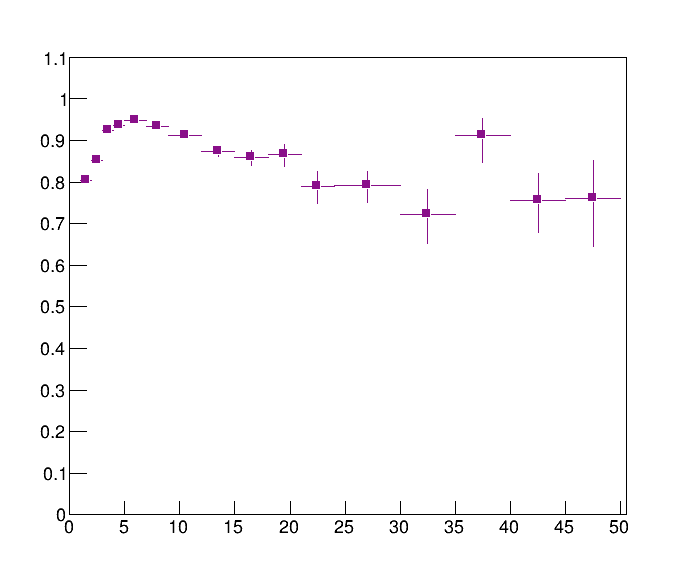

In [7]:
# f_out = TFile.Open("output_Data2018_newMenu.root")
f_out = TFile.Open("output_Data2018_newMenudRCut0p3.root")
#canv = DrawTrig(dir_L1Smu, canv)
#canv.SaveAs("Eff_Sectrum_pt_L1SingleMuOpen.pdf")
# canv = DrawTrig(dir_L1Dmu, canv)
# canv.SaveAs("Eff_Sectrum_pt_L1DoubleMuOpen.pdf")
# canv = DrawTrig(dir_L2Dmu, canv)
# canv.SaveAs("Eff_Sectrum_pt_L2DoubleMuOpen.pdf")
# canv = DrawTrig(dir_L3Dmu, canv)
# canv.SaveAs("Eff_Sectrum_pt_L3DoubleMuOpen.pdf")
canv = DrawTrigOne(f_out.Get("HLT_HIL1DoubleMu0_Open_v"), 'pt', canv)
canv.SaveAs("Eff_pt_L1DoubleMuOpen.pdf")
canv = DrawTrigOne(f_out.Get("HLT_HIL3DoubleMu0_Open_v"), 'pt', canv)
canv.SaveAs("Eff_pt_L3DoubleMuOpen.pdf")
canv = DrawTrigOne(f_out.Get("HLT_HIL1Mu0_v"), 'pt', canv)
canv.SaveAs("Eff_pt_L1SingleMuOpen.pdf")
# canv = DrawTrigOne(f_out.Get("HLT_HIL2Mu0_L1DoubleMu0_v"), canv)
# canv.SaveAs("Eff_pt_L2DoubleMuOpen.pdf")
# canv = DrawTrigOne(f_out.Get("HLT_HIL3Mu0_L1DoubleMuOpen_v"), canv)
# canv.SaveAs("Eff_pt_L3DoubleMuOpen.pdf")

In [8]:
canv.Clear();


In [9]:
f_old = TFile.Open("outputEff_HLT_Track_miscal.root")

In [10]:
f_leg = TFile.Open("output_Data2018_LegacydR0p3.root")

In [11]:
d_old = f_old.Get("effDoubleMuon_HLT_HIL3DoubleMuOpen_v1_Pt")

and
and
and


Info in <TCanvas::Print>: pdf file Eff_pt_L1DoubleMuOpen_Comp.pdf has been created
Info in <TCanvas::Print>: pdf file Eff_pt_L2DoubleMuOpen_Comp.pdf has been created
Info in <TCanvas::Print>: pdf file Eff_pt_L3DoubleMuOpen_Comp.pdf has been created


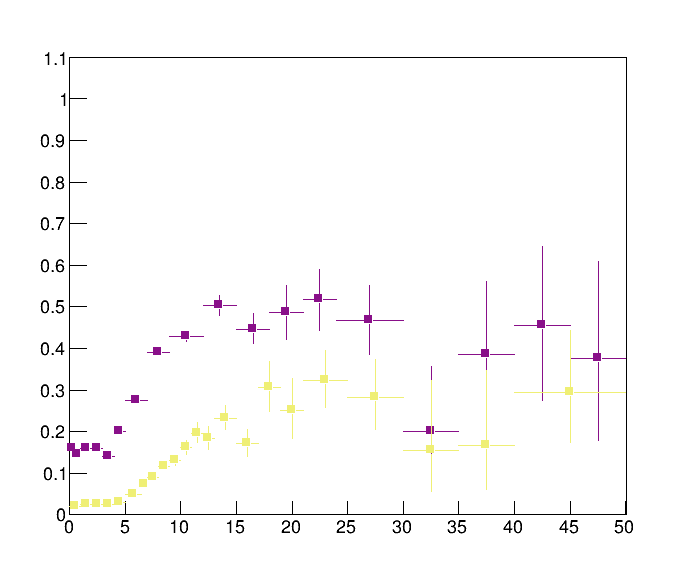

In [17]:
canv = DrawTrigOne(f_out.Get("HLT_HIL1DoubleMu0_Open_v"), 'pt', canv)
canv = DrawTrigOne(f_out.Get("HLT_HIL1DoubleMu0_Zero_v"), 'pt', canv, _col = 218)
canv = DrawTrigOne(f_out.Get("HLT_HIL1DoubleMu0_SQ_v"), 'pt', canv, _col = 208)
canv = DrawTrigOne(f_old.Get("effDoubleMuon_HLT_HIL1DoubleMuOpen_v1_Pt"), 'effDoubleMuon_HLT_HIL1DoubleMuOpen_v1_Pt_online', canv, _and = True)
canv.SaveAs("Eff_pt_L1DoubleMuOpen_Comp.pdf")
canv = DrawTrigOne(f_out.Get("HLT_HIL2DoubleMu0_Open_v"), 'pt', canv)
canv = DrawTrigOne(f_old.Get("effDoubleMuon_HLT_HIL2DoubleMuOpen_v1_Pt"), 'effDoubleMuon_HLT_HIL2DoubleMuOpen_v1_Pt_online', canv, _and = True)
canv.SaveAs("Eff_pt_L2DoubleMuOpen_Comp.pdf")
canv = DrawTrigOne(f_out.Get("HLT_HIL3DoubleMu0_Open_v"), 'pt', canv)
canv = DrawTrigOne(f_old.Get("effDoubleMuon_HLT_HIL3DoubleMuOpen_v1_Pt"), 'effDoubleMuon_HLT_HIL3DoubleMuOpen_v1_Pt_online', canv, _and = True)
canv.SaveAs("Eff_pt_L3DoubleMuOpen_Comp.pdf")

In [13]:
def hicanv(canv ):
    canv.Draw()
    return canv

In [52]:
leg = TLegend(0.15,0.12,0.45,0.35)
leg.SetBorderSize(0)

Info in <TCanvas::Print>: pdf file Eff_pt_L1DoubleMuOpen_Comp.pdf has been created
Info in <TCanvas::Print>: pdf file Eff_pt_L2DoubleMuOpen_Comp.pdf has been created
Info in <TCanvas::Print>: pdf file Eff_pt_L3DoubleMuOpen_Comp.pdf has been created


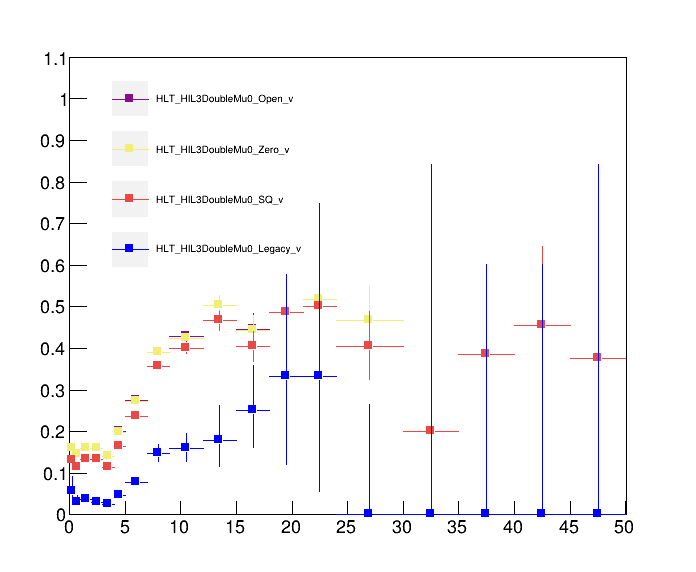

In [67]:
leg.SetX1(0.15);leg.SetX2(0.45);leg.SetY1(0.12);leg.SetY2(0.35);
leg.Clear()
canv, leg = DrawTrigSeq(f_out.Get("HLT_HIL1DoubleMu0_Open_v"), 'pt', canv, _col = 221, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Open_v")
canv, leg = DrawTrigSeq(f_out.Get("HLT_HIL1DoubleMu0_Zero_v"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Zero_v")
canv, leg = DrawTrigSeq(f_out.Get("HLT_HIL1DoubleMu0_SQ_v"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "HLT_HIL1DoubleMu0_SQ_v")
canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL1DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 5, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Legacy_v")
leg.DrawClone()
canv.Draw()
leg.Clear()
canv.SaveAs("Eff_pt_L1DoubleMuOpen_Comp.pdf")

canv, leg = DrawTrigSeq(f_out.Get("HLT_HIL2DoubleMu0_Open_v"), 'pt', canv, _col = 221, _leg = leg, _disc = "HLT_HIL2DoubleMu0_Open_v")
canv, leg = DrawTrigSeq(f_out.Get("HLT_HIL2DoubleMu0_Zero_v"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "HLT_HIL2DoubleMu0_Zero_v")
canv, leg = DrawTrigSeq(f_out.Get("HLT_HIL2DoubleMu0_SQ_v"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "HLT_HIL2DoubleMu0_SQ_v")
canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL2DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 5, _leg = leg, _disc = "HLT_HIL2DoubleMu0_Legacy_v")
leg.DrawClone()
canv.Draw()
leg.Clear()
# canv = DrawTrigOne(f_out.Get("HLT_HIL2DoubleMu0_Open_v"), 'pt', canv)
# canv = DrawTrigOne(f_leg.Get("HLT_HIL2DoubleMuOpen_v"), 'pt', canv, _and = True)
canv.SaveAs("Eff_pt_L2DoubleMuOpen_Comp.pdf")
# canv = DrawTrigOne(f_out.Get("HLT_HIL3DoubleMu0_Open_v"), 'pt', canv)
# canv = DrawTrigOne(f_leg.Get("HLT_HIL3DoubleMuOpen_v"), 'pt', canv, _and = True)
canv, leg = DrawTrigSeq(f_out.Get("HLT_HIL3DoubleMu0_Open_v"), 'pt', canv, _col = 221, _leg = leg, _disc = "HLT_HIL3DoubleMu0_Open_v")
canv, leg = DrawTrigSeq(f_out.Get("HLT_HIL3DoubleMu0_Zero_v"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "HLT_HIL3DoubleMu0_Zero_v")
canv, leg = DrawTrigSeq(f_out.Get("HLT_HIL3DoubleMu0_SQ_v"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "HLT_HIL3DoubleMu0_SQ_v")
canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL3DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 5, _leg = leg, _disc = "HLT_HIL3DoubleMu0_Legacy_v")
leg.SetY1(0.52);leg.SetY2(0.87);
leg.DrawClone()
leg.Clear()
canv.Draw()
canv.SaveAs("Eff_pt_L3DoubleMuOpen_Comp.pdf")